

# Project: Investigate a Dataset - [Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  The dataset contains informations about 10.000 movies.it include 21 columns :revenue,release date,vote,cast,title,budget, director,genres,...

### Question(s) for Analysis
>**question 1**:Which year have the highest bugdet and highest revenue 

>**question 2**:Top 10 directors according to high revenue?

>**question 3**:which genres are most popular

>**question 4**:the runtime /vote over the years


>**question 5**:What is the relationship between properties that make film have the highest revenue


>   

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [4]:
#show the number of columns and rows
df.shape

(10866, 21)

In [5]:
#show columns name
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#Drop extraneous columns
df.drop(['id','original_title','homepage','tagline', 'keywords', 'overview', 'production_companies','budget_adj','revenue_adj']
        , axis=1,inplace=True)


In [7]:
#show columns after drop
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [8]:
#show data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
imdb_id         10856 non-null object
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
cast            10790 non-null object
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


In [9]:
#check columns null
df.isnull().sum()

imdb_id         10
popularity       0
budget           0
revenue          0
cast            76
director        44
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [10]:
#statistics summary
df.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000



### Data Cleaning
  >The relase_date is in string format.it must be changed to datatime type format.
  
  >the minimum rutime is 0 so it will be replaced with nan and dropped.
  
  >the same with budget and revenue
  

In [11]:
#Edit release_date from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
#put zero with nan in runtime, revenue, budget
df[['runtime','budget','revenue']]=df[['runtime','budget','revenue']].replace({0:np.nan})

In [13]:
#drop nan columns in dataframe
df.dropna(inplace=True)
df.shape

(3850, 12)

In [14]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
#Check again for null values
df.isna().sum()

imdb_id         0
popularity      0
budget          0
revenue         0
cast            0
director        0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [16]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 12 columns):
imdb_id         3849 non-null object
popularity      3849 non-null float64
budget          3849 non-null float64
revenue         3849 non-null float64
cast            3849 non-null object
director        3849 non-null object
runtime         3849 non-null float64
genres          3849 non-null object
release_date    3849 non-null datetime64[ns]
vote_count      3849 non-null int64
vote_average    3849 non-null float64
release_year    3849 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 390.9+ KB


<a id='eda'></a>
>**Now the data is ready to be analysed**


<a id='eda'></a>
## Exploratory Data Analysis 


### Research Question 1 (Which year have the highest budget  and highest revenue       ?)

In [17]:
# calculate the budget per year
bug_avg = df.groupby('release_year',as_index = False)['budget'].mean()
bug_avg.head()


,release_year,budget
0,1960,4.161390e+06
1,1961,3.863700e+06
2,1962,5.635714e+06
3,1963,1.018583e+07
4,1964,4.847880e+06


In [18]:
# filtre year with the highest budget          
bug_avg[bug_avg['budget'] == bug_avg['budget'].max()]

,release_year,budget
52,2012,4.831281e+07


In [19]:
rev_avg = df.groupby('release_year',as_index = False)['revenue'].mean()
rev_avg.head()

,release_year,revenue
0,1960,2.580100e+07
1,1961,3.377202e+07
2,1962,2.947569e+07
3,1963,2.942115e+07
4,1964,4.694479e+07


In [20]:
rev_avg[rev_avg['revenue'] == rev_avg['revenue'].max()]

,release_year,revenue
55,2015,1.637683e+08


> year with high budget does not be neceessary will have the highest revenue.we have 2012 with highest budgest but 2015 have the highest revenu.that mean there are other parameter influnence the highest revenue.

### Research Question 2  ( Top 10 directors according to high revenu?)

In [21]:

#Data to be plotted

directors = df.groupby('director')['revenue'].sum()
directors =directors.sort_values(ascending = True)[:10]
directors

director
Shinichiro Watanabe     5.0
Gilbert Adler           5.0
Peter Hall              6.0
Bille August            6.0
Rusty Cundieff         11.0
Benedikt Erlingsson    11.0
Andy Cadiff            12.0
Adam Marcus            15.0
John Harrison          16.0
Gregory Widen          16.0
Name: revenue, dtype: float64

>this list of director who make the highest revenu .It means the film who has one of these director has the probability to be high revenu 

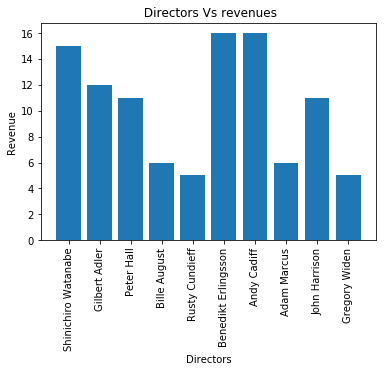

In [22]:
fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(directors.index,rotation=90)
ax.set_title(" Directors Vs revenues")
ax.set_xlabel('Directors')
ax.set_ylabel('Revenue')

ax.bar(directors.index, directors);

### Research Question3  ( which genres are most popular  ?)

In [23]:
# Extract all the years into a list
year = list(df['release_year'].unique())
print(year)

[2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994, 2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007, 1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989, 1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961, 1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978, 1966]


In [24]:
# put all the uniques genres in the dataset into a list
A = []
B = set()

# Pull the genres from the dataframe into a list 
for i in df['genres']:
    A.append(i.split('|'))

# extract unique genres into set to prevent duplication
for i in A:
    for j in i:
        B.add(j)

# Convert set to list
genre = list(B)
print (genre)

['TV Movie', 'War', 'Music', 'Horror', 'Foreign', 'Science Fiction', 'Animation', 'Documentary', 'Action', 'Adventure', 'Western', 'History', 'Thriller', 'Fantasy', 'Mystery', 'Family', 'Crime', 'Drama', 'Romance', 'Comedy']


In [25]:
# Calculate number of occurence of each genre per year and append into data
data = []

for i in year:
    # Filter DataFrame by each year
    _df = df[df['release_year'] == i][['release_year', 'genres']]
    
    # Find the number of occuring genre per year
    for j in genre:
        # Number of rows each genres occur
        count = _df['genres'].str.contains(j).sum()
        K = i, j, count
        data.append(K)
# Convert data into DataFrame
genre_data = pd.DataFrame(data, columns=['year', 'genre', 'count']).sort_values(by=['year', 'count'], ascending=False)
genre_data.head()

,year,genre,count
17,2015,Drama,81
19,2015,Comedy,52
12,2015,Thriller,47
8,2015,Action,37
9,2015,Adventure,34


In [26]:
# select the most popular genres per year
pop_genre = genre_data.groupby('year').head(1).set_index(['year', 'genre'])
print(pop_genre)

                count
year genre           
2015 Drama         81
2014 Drama         79
2013 Drama         80
2012 Drama         66
2011 Drama         89
2010 Drama         84
2009 Drama         83
2008 Drama         80
2007 Drama         75
2006 Drama         89
2005 Drama         82
2004 Drama         62
2003 Comedy        45
2002 Drama         63
2001 Comedy        51
2000 Drama         45
1999 Comedy        56
1998 Drama         45
1997 Thriller      40
1996 Drama         47
1995 Drama         42
1994 Comedy        27
1993 Drama         36
1992 Drama         27
1991 Comedy        22
1990 Drama         22
1989 Comedy        24
1988 Comedy        25
1987 Comedy        23
1986 Drama         19
1985 Comedy        19
1984 Action        16
1983 Thriller      13
1982 Drama         12
1981 Thriller       9
1980 Drama          8
1979 Drama          7
1978 Drama          7
1977 Drama          9
1976 Drama          7
1975 Drama          5
1974 Drama          8
1973 Drama          7
1972 Actio

> Most popular genre is Drama.

### Research Question 4( What is the relationship between properties that make film have the highest revenue)

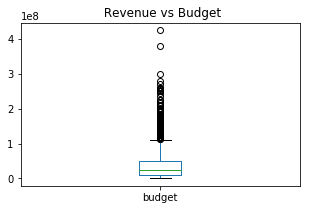

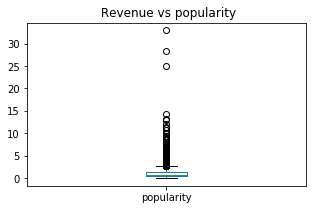

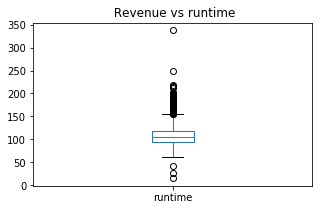

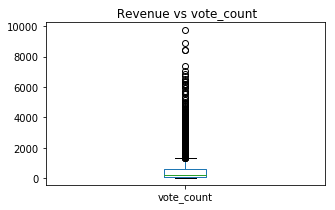

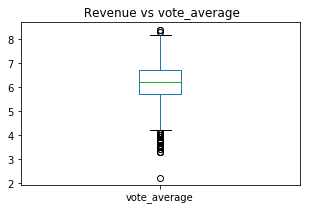

In [31]:
def plot(df,x_axis, y_axis, title):
    df.plot(kind='box', x= x_axis , y=y_axis,title=title, figsize=(5,3))

    plt.show()
    
plot(df,'revenue',  'budget', ' Revenue vs Budget')
plot(df,'revenue',  'popularity', ' Revenue vs popularity')
plot(df,'revenue',  'runtime', ' Revenue vs runtime')
plot(df,'revenue',  'vote_count', ' Revenue vs vote_count')
plot(df,'revenue',  'vote_average', ' Revenue vs vote_average')
  

>The higher the budget, the higher the revenue

>A weak positive correlation, more popularity leads to silghtly higher revenue.

>No correlation between revenue and runtime

>Positive correlation between revenue and vote count.

>No correlation between revenue and vote average

### Research Question5 ( the runtime over the years)


In [ ]:
 # use  the groupby function to find average runtime of movies per year 
df_runtime = df.groupby('release_year', as_index=False)['runtime'].mean()


In [ ]:
df_runtime.plot(x='release_year',y='runtime',color='green',figsize=(10,5), grid=True)
plt.xlabel('year')
plt.ylabel('Runtime')
plt.title('Runtime vs Year', fontsize=16)
plt.show()

The runtime has decrease over the year

### Research Question5 ( Is the number of movies increase from year to year)


Text(0.5,1,'the number of movies  from year to year')

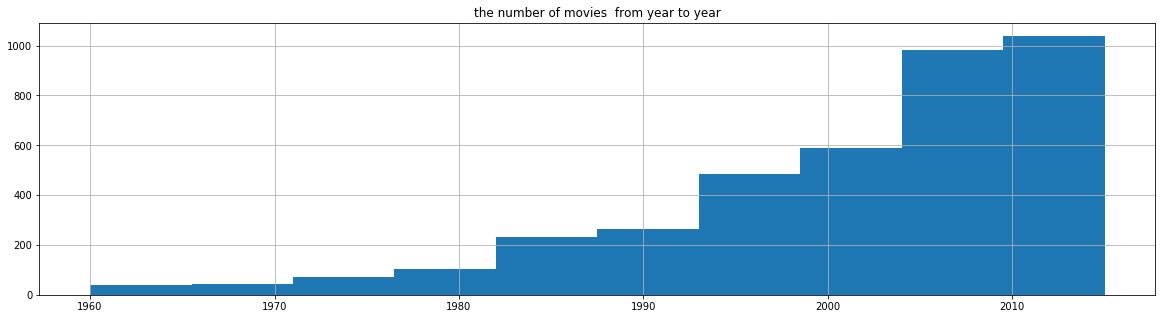

In [39]:
#hist 

df.hist(column='release_year',figsize = (20,5));
plt.title('the number of movies  from year to year')

 >The numbre of movies increase from year to year espacially after 2010

<a id='conclusions'></a>
## Conclusions
After this analysis we can conclude the following:

> **runtime get over and over less.

> **Drama is most popular genres. 

> **Budget, vote count and popularity influence the increase of the revenue 

> **one of these : Shinichiro Watanabe , Gilbert Adler,  Peter Hall should be the director

> **The numbre of movies increase from year to year 

## Limitations

>There were null and invalid values in some features like budget and revenue haveing zeros,

>runtime  has zeros which were replaced with nan and eventually dropped.

>Genre  has  nan values which was dropped. 

>The data also contains duplicate values which were dropped from the data set. 

>All this limitaion affect the statistics done during the Analysis.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])